## set echo set
create header, and fill the file after shuffle
``` 
     head -1 usa_00002.csv | awk -F ',' 'BEGIN{OFS=",";} {print $7,$44,$22}' > e.csv
     tail -n+2  usa_00002.csv | gshuf | awk -F ',' 'BEGIN{OFS=",";} {print $7,$44,$22}' >> e.csv
 ```       

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

#from matplotlib.pyplot import figure

print("matplotlib version: {}".format(matplotlib.__version__))
import mglearn
print("mglearn version: {}".format(mglearn.__version__))

#read the data file
path = './e.csv'
%time df = pd.read_csv(path)

states = pd.read_csv('./FIPS.csv')

matplotlib version: 2.2.2
mglearn version: 0.1.6
CPU times: user 1.05 s, sys: 278 ms, total: 1.33 s
Wall time: 1.19 s


In [2]:
states

,stname,STATEFIP,stusps
0,Alabama,1,AL
1,Alaska,2,AK
2,Arizona,4,AZ
3,Arkansas,5,AR
4,California,6,CA
5,Colorado,8,CO
6,Connecticut,9,CT
7,Delaware,10,DE
8,District of Columbia,11,DC
9,Florida,12,FL


In [3]:
# Shows averages per state
df = df[(df.INCTOT < 9999999) & (df.INCTOT !=0) ]

avgbystate = df.groupby(df.STATEFIP).mean()
avgbystate





,INCTOT,FAMSIZE
STATEFIP,,
1,37737.017404,2.496513
2,39315.688723,3.231188
4,42130.305618,2.678925
5,34966.792488,2.524678
6,51546.729524,2.956305
8,49514.088319,2.564672
9,59812.380191,2.580051
10,47340.526122,2.576889
11,70425.451973,2.066987


In [4]:
#result = pd.merge(avgbystate,states, on='df.STATEFIP=states.STATEFIP', how='left')
result = avgbystate.join(states, how='left')
#result = result.stname,result.FAMSIZE,result.INCTOT
r = result.round(2)
#r3 = r2.drop(columns=['stname'])
#del r2['stname']
#del r2['INCTOT']
#r2.dtypes
#['INCTOT', 'FAMSIZE', 'stname', ' STATEFIP', ' stusps']
r =r[['stname', 'INCTOT','FAMSIZE']]
r

,stname,INCTOT,FAMSIZE
STATEFIP,,,
1,Alaska,37737.02,2.50
2,Arizona,39315.69,3.23
4,California,42130.31,2.68
5,Colorado,34966.79,2.52
6,Connecticut,51546.73,2.96
8,District of Columbia,49514.09,2.56
9,Florida,59812.38,2.58
10,Georgia,47340.53,2.58
11,Hawaii,70425.45,2.07


In [5]:
#reduce the dataframe to just the state and family size
df2 = df[['STATEFIP','FAMSIZE']]
a2 = df2.values #convert Data Frames to an Array 
a2.size
df3 = df[['INCTOT','FAMSIZE']]
a3 = df3.values


In [6]:
import numpy as np
from sklearn.cluster import KMeans



state_famzie_kmeans = KMeans(n_clusters=3)
state_famzie_kmeans.fit(a2)

income_famsize_kmeans =  KMeans(n_clusters=3)
income_famsize_kmeans.fit(a3)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
print ("cluser membership:\n{}".format(state_famzie_kmeans.labels_))

cluser membership:
[0 1 1 ... 1 1 2]


In [8]:
print(state_famzie_kmeans.predict(a2))
print(state_famzie_kmeans.predict(a3))

[0 1 1 ... 1 1 2]
[1 1 1 ... 1 1 1]


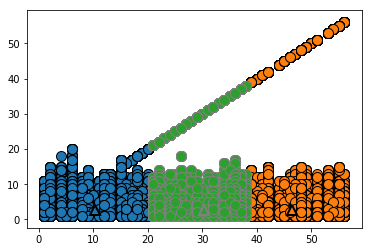

In [9]:
mglearn.discrete_scatter(a2[:,0],a2[:,], state_famzie_kmeans.labels_,markers='o')
mglearn.discrete_scatter(
    state_famzie_kmeans.cluster_centers_[:, 0], state_famzie_kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

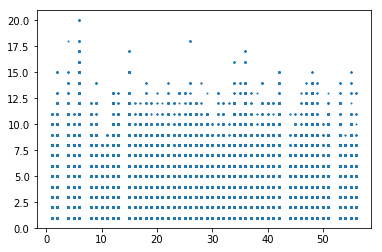

In [10]:
plt.scatter(df2.STATEFIP,df2.FAMSIZE, s=1)

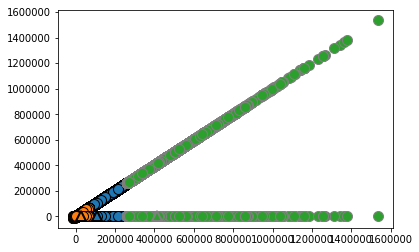

In [11]:
mglearn.discrete_scatter(a3[:,0],a3[:,], income_famsize_kmeans.labels_,markers='o')
mglearn.discrete_scatter(
    income_famsize_kmeans.cluster_centers_[:, 0], income_famsize_kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

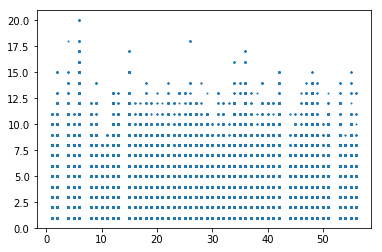

In [12]:
plt.scatter(df2.STATEFIP,df2.FAMSIZE, s=1)

